In [ ]:
# Modulos y datos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Submodulo model_selection: train_test_split
from sklearn.model_selection import train_test_split

# LMG : Regresion logistica 
from sklearn.linear_model import LogisticRegression

# Submodulo metrics : Indicadores de calidad 
from sklearn import metrics

# Carguemos un dataset
data= pd.read_csv("https://raw.githubusercontent.com/robintux/Datasets4StackOverFlowQuestions/master/breast-cancer-wisconsin.csv")




In [ ]:
# Nombre de columnas 
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
# Valores faltantes
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
# Variable dependiente : diagnosis 
# Posibles valores de la variable diagnosis
data.diagnosis.unique()
# M : Maligno
# B : Benigno

array(['M', 'B'], dtype=object)

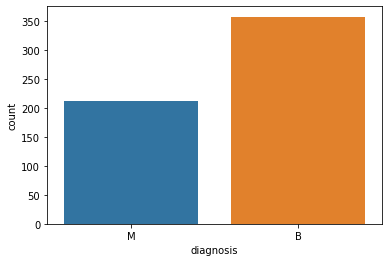

In [ ]:
# Mostremos como se distribuye la varible depediente
sns.countplot(x = "diagnosis",
              data = data)

In [ ]:
# Separar las variables independientes de la dependiente
y = data.diagnosis
X = data.drop(["diagnosis", "id", "Unnamed: 32"], axis = 1)

In [ ]:
# Construyamos el modelo de regresion logistica 

# particionamiento de los datos 
Xtrain, Xtestm,ytrain, ytest = train_test_split(X, y,
                                                test_size = 0.25,
                                                stratify= y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


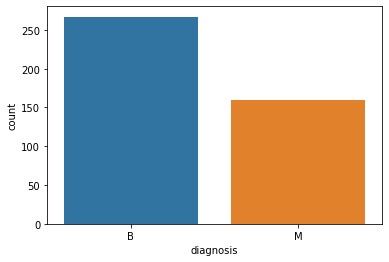

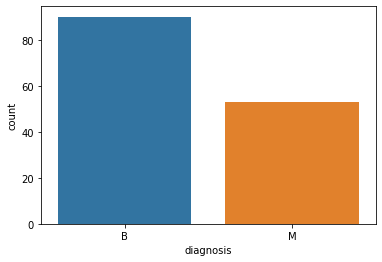

In [ ]:
# Obervemos como a muestreado la variable dependiete en train/test
plt.figure(1)
sns.countplot(ytrain)
plt.figure(2)
sns.countplot(ytest)

In [ ]:
# INstanciamos el modelo 
ModClfBase = LogisticRegression()

# Ajustamos (fit) el modelo a los datos de entrenamiento 
ModClfBase.fit(Xtrain, ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# En funcion al mensaje :
# STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
# Buscaremos la manera de aumentar el numero de iteraciones que el algoritmo/
# realiza para encontrar los parametros del modelo 
# DOcumentacion de la clase LogisticRegression
# help(LogisticRegression)

ModClfBase_Ver1 = LogisticRegression(max_iter= 20000)
ModClfBase_Ver1.fit(Xtrain, ytrain)

LogisticRegression(max_iter=20000)

In [ ]:
# Calculemos el R2
ModClfBase_Ver1.score(Xtestm,ytest)

0.9440559440559441

In [ ]:
# Observemos la documentacion de la clase LogisticRegression
help(LogisticRegression)

In [ ]:
# Los argumentos de la clase LogisticRegression son :
penalty='l2'
dual=False
tol=0.0001
C=1.0
fit_intercept=True
intercept_scaling=1
class_weight=None
# 
random_state=None
# 
solver='lbfgs'
max_iter=100
multi_class='auto'
# 
verbose=0
# 
warm_start=False
# 
n_jobs=None
# 
l1_ratio=None

In [ ]:
# Hagamos un barrido de hiperparametros 
from sklearn.model_selection import GridSearchCV

# Definir un diccionario con los hiperparametros
DictHP_Log = {"C": np.logspace(-4,4,35),
              "solver" : ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
              "penalty" : ["l1", "l2", "elastic", "none"],
              "dual" : [True, False],
              "fit_intercept" : [True, False]}

In [ ]:
# Numero de modelos :
35*5*4*2*2

2800

In [ ]:
# Modelo base : Este modelo se ejecutara/ajustara 2800 veces
ModClf = LogisticRegression(max_iter = 20000)

# COnfiguramos el gridsearchCV
ModClfGS1 = GridSearchCV(estimator =ModClf,
                         param_grid = DictHP_Log,
                         cv = 5,
                         verbose = 4)

In [ ]:
# Numero de modelos
2800 *5

14000

In [ ]:
#  Procedimiento para ajustar mis 14000 modelos al conjunto de datos de 
# entrenamiento es el sgte:
MejorModeloClf = ModClfGS1.fit(Xtrain, ytrain)

Fitting 5 folds for each of 2800 candidates, totalling 14000 fits
[CV 1/5] END C=0.0001, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.0001, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, dual=True, 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   3.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.6s
[CV 1/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0001, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.0001, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.0001, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;,

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   3.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0001, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   1.3s
[CV 1/5] END C=0.00017190722018585745, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.00017190722018585745, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.00017190722018585745, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.00017190722018585745, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.00017190722018585745, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.00017190722018585745, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.00017190722018585745, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan to

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   2.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   2.2s
[CV 1/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.00017190722018585745, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=l1

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   3.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.8s
[CV 1/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.00017190722018585745, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   1.0s
[CV 1/5] END C=0.0002955209235202888, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0002955209235202888, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0002955209235202888, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0002955209235202888, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0002955209235202888, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.0002955209235202888, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0002955209235202888, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, sco

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   5.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.0s
[CV 1/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0002955209235202888, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.9s
[CV 1/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=l1, solver

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   1.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   3.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0002955209235202888, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.0005080218046913023, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0005080218046913023, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0005080218046913023, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0005080218046913023, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0005080218046913023, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.0005080218046913023, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0005080218046913023, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, scor

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   5.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.1s
[CV 1/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0005080218046913023, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=l1, solver

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   2.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   3.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0005080218046913023, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.0008733261623828437, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0008733261623828437, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0008733261623828437, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0008733261623828437, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0008733261623828437, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.0008733261623828437, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0008733261623828437, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, scor

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   4.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.1s
[CV 1/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0008733261623828437, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=l1, solver

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   2.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   3.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0008733261623828437, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.0015013107289081743, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0015013107289081743, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0015013107289081743, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0015013107289081743, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0015013107289081743, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.0015013107289081743, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0015013107289081743, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, scor

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   2.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   4.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.2s
[CV 1/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0015013107289081743, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   1.2s
[CV 1/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=l1, solver

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   3.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   1.0s
[CV 1/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0015013107289081743, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.0025808615404180743, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0025808615404180743, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0025808615404180743, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0025808615404180743, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0025808615404180743, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.0025808615404180743, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0025808615404180743, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, scor

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   2.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.1s
[CV 1/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0025808615404180743, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=l1, solver

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   2.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.0025808615404180743, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   1.0s
[CV 1/5] END C=0.004436687330978612, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.004436687330978612, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.004436687330978612, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.004436687330978612, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.004436687330978612, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.004436687330978612, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.004436687330978612, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan t

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   2.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   4.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.1s
[CV 1/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.004436687330978612, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   1.2s
[CV 1/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;,

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   4.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.004436687330978612, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.9s
[CV 1/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan to

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.907 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.894 total time=   0.8s
[CV 1/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.007626985859023444, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.007626985859023444, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.907 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.007626985859023444, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.007626985859023444, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.007626985859023444, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.007626985859023444, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.894 total time=   0.8s
[CV 1/5] END C=0.007626985859023444, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.007626985859023444, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.007626985859023444, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.007626985859023444, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.007626985859023444, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.007626985859023444, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.007626985859023444, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   4.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.1s
[CV 1/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.007626985859023444, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;,

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   3.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.007626985859023444, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan to

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.907 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.941 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.894 total time=   1.0s
[CV 1/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.013111339374215644, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.013111339374215644, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.907 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.013111339374215644, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.013111339374215644, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.941 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.013111339374215644, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.013111339374215644, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.894 total time=   0.9s
[CV 1/5] END C=0.013111339374215644, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.013111339374215644, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.013111339374215644, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.013111339374215644, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.013111339374215644, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.013111339374215644, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.013111339374215644, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   3.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.2s
[CV 1/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.013111339374215644, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;,

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   2.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   3.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.013111339374215644, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan to

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.907 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.941 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.894 total time=   1.2s
[CV 1/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.022539339047347912, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.022539339047347912, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.907 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.022539339047347912, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.022539339047347912, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.941 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.022539339047347912, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.022539339047347912, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.906 total time=   1.0s
[CV 1/5] END C=0.022539339047347912, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.022539339047347912, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.022539339047347912, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.022539339047347912, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.022539339047347912, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.022539339047347912, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.022539339047347912, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   4.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.1s
[CV 1/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.022539339047347912, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;,

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   4.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.022539339047347912, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total tim

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.930 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.941 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.906 total time=   1.0s
[CV 1/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.03874675120456132, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=0.03874

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.03874675120456132, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.919 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.03874675120456132, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.03874675120456132, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.941 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.03874675120456132, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.03874675120456132, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.906 total time=   1.0s
[CV 1/5] END C=0.03874675120456132, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.03874675120456132, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.03874675120456132, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.03874675120456132, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.03874675120456132, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.03874675120456132, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.03874675120456132, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   3.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   2.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.1s
[CV 1/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.03874675120456132, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   1.1s
[CV 1/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=n

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   2.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.03874675120456132, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   1.3s
[CV 1/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.919 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.871 total time=   1.1s
[CV 1/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.06660846290809154, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=0.06660

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.06660846290809154, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.907 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.06660846290809154, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.06660846290809154, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.941 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.06660846290809154, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.06660846290809154, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.906 total time=   1.5s
[CV 1/5] END C=0.06660846290809154, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.06660846290809154, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.06660846290809154, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.06660846290809154, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.06660846290809154, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.06660846290809154, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.06660846290809154, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   3.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.1s
[CV 1/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.06660846290809154, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=n

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   1.0s
[CV 1/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.06660846290809154, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.919 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.882 total time=   1.1s
[CV 1/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.11450475699382812, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=0.11450

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.11450475699382812, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.11450475699382812, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.11450475699382812, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.11450475699382812, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.11450475699382812, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.906 total time=   1.1s
[CV 1/5] END C=0.11450475699382812, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.11450475699382812, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.11450475699382812, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.11450475699382812, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.11450475699382812, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.11450475699382812, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.11450475699382812, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   4.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.2s
[CV 1/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.11450475699382812, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=n

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   3.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   2.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.11450475699382812, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.9s
[CV 1/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.919 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.976 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.894 total time=   1.2s
[CV 1/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.19684194472866112, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=0.19684

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.19684194472866112, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.895 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.19684194472866112, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.19684194472866112, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.19684194472866112, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.976 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.19684194472866112, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.929 total time=   1.2s
[CV 1/5] END C=0.19684194472866112, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.19684194472866112, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.19684194472866112, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.19684194472866112, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.19684194472866112, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.19684194472866112, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.19684194472866112, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   2.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.1s
[CV 1/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.19684194472866112, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=n

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.1s
[CV 1/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.19684194472866112, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.976 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.894 total time=   1.6s
[CV 1/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.33838551534282335, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=0.33838

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.33838551534282335, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.33838551534282335, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.33838551534282335, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.33838551534282335, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.33838551534282335, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.894 total time=   1.2s
[CV 1/5] END C=0.33838551534282335, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.33838551534282335, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.33838551534282335, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.33838551534282335, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.33838551534282335, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.33838551534282335, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.33838551534282335, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   2.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   2.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.1s
[CV 1/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.33838551534282335, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   1.3s
[CV 1/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=n

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   2.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.33838551534282335, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.941 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.894 total time=   1.2s
[CV 1/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.5817091329374358, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=0.5817091329374

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=0.5817091329374358, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=0.5817091329374358, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.941 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=0.5817091329374358, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=0.5817091329374358, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.976 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=0.5817091329374358, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.906 total time=   1.2s
[CV 1/5] END C=0.5817091329374358, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=0.5817091329374358, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=0.5817091329374358, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=0.5817091329374358, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=0.5817091329374358, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=0.5817091329374358, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=0.5817091329374358, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=0.58170

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   5.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.1s
[CV 1/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.5817091329374358, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   2.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   1.0s
[CV 1/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=0.5817091329374358, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   1.4s
[CV 1/5] END C=1.0, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1.0, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.919 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1.0, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1.0, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1.0, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.918 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1.0, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.894 total time=   1.2s
[CV 1/5] END C=1.0, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, dual=True, fit_intercept

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1.0, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.907 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1.0, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1.0, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1.0, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.882 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1.0, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.894 total time=   1.7s
[CV 1/5] END C=1.0, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, dual=True, fit_

/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=1.0, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s
[CV 3/5] END C=1.0, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s
[CV 4/5] END C=1.0, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s
[CV 5/5] END C=1.0, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.2s
[CV 1/5] END C=1.0, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s
[CV 2/5] END C=1.0, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.9s
[CV 3/5] END C=1.0, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   3.0s
[CV 4/5] END C=1.0, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.0s
[CV 5/5] END C=1.0, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1.7190722018585747, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.919 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1.7190722018585747, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.929 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1.7190722018585747, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1.7190722018585747, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1.7190722018585747, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.906 total time=   1.3s
[CV 1/5] END C=1.7190722018585747, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1.7190722018585747, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1.7190722018585747, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1.7190722018585747, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1.7190722018585747, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1.7190722018585747, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=1.7190722018585747, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=1.7190722018585

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1.7190722018585747, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.907 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1.7190722018585747, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1.7190722018585747, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1.7190722018585747, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.976 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1.7190722018585747, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.882 total time=   1.4s
[CV 1/5] END C=1.7190722018585747, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1.7190722018585747, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1.7190722018585747, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1.7190722018585747, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1.7190722018585747, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1.7190722018585747, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=1.7190722018585747, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=1.71907

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   2.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   2.5s
[CV 1/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1.7190722018585747, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   3.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1.7190722018585747, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.849 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.941 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.976 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.976 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.882 total time=   1.3s
[CV 1/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=2.955209235202888, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=2.955209235202888, dual

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=2.955209235202888, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=2.955209235202888, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=2.955209235202888, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=2.955209235202888, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.976 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=2.955209235202888, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.906 total time=   1.3s
[CV 1/5] END C=2.955209235202888, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=2.955209235202888, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=2.955209235202888, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=2.955209235202888, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=2.955209235202888, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=2.955209235202888, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=2.955209235202888, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=2.9552092352028

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   3.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.8s
[CV 1/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=2.955209235202888, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=  

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   4.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   1.0s
[CV 1/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=2.955209235202888, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   1.3s
[CV 1/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.907 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.941 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.894 total time=   1.3s
[CV 1/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=5.080218046913023, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=5.080218046913023, dual

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=5.080218046913023, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=5.080218046913023, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.941 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=5.080218046913023, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=5.080218046913023, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.976 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=5.080218046913023, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.882 total time=   1.5s
[CV 1/5] END C=5.080218046913023, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=5.080218046913023, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=5.080218046913023, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=5.080218046913023, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=5.080218046913023, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=5.080218046913023, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=5.080218046913023, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=5.0802180469130

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   3.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   2.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.1s
[CV 1/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=5.080218046913023, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   1.2s
[CV 1/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=  

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=5.080218046913023, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   1.3s
[CV 1/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.895 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.906 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.906 total time=   1.7s
[CV 1/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=8.733261623828437, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=8.733261623828437, dual

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=8.733261623828437, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.907 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=8.733261623828437, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=8.733261623828437, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=8.733261623828437, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.976 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=8.733261623828437, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.894 total time=   1.3s
[CV 1/5] END C=8.733261623828437, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=8.733261623828437, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=8.733261623828437, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=8.733261623828437, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=8.733261623828437, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=8.733261623828437, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=8.733261623828437, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=8.7332616238284

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   2.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.3s
[CV 1/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=8.733261623828437, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=  

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   3.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   1.0s
[CV 1/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=8.733261623828437, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.919 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.882 total time=   1.8s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.835 total time=   1.4s
[CV 1/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=15.013107289081743, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=15.013107289081

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=15.013107289081743, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.919 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=15.013107289081743, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.906 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=15.013107289081743, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=15.013107289081743, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=15.013107289081743, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.894 total time=   1.4s
[CV 1/5] END C=15.013107289081743, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=15.013107289081743, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=15.013107289081743, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=15.013107289081743, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=15.013107289081743, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=15.013107289081743, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=15.013107289081743, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=15.0131

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   4.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.2s
[CV 1/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=15.013107289081743, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=15.013107289081743, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.826 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.976 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.894 total time=   1.5s
[CV 1/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=25.808615404180767, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=25.808615404180

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=25.808615404180767, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.919 total time=   1.8s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=25.808615404180767, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.941 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=25.808615404180767, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=25.808615404180767, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.976 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=25.808615404180767, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.894 total time=   1.4s
[CV 1/5] END C=25.808615404180767, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=25.808615404180767, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=25.808615404180767, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=25.808615404180767, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=25.808615404180767, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=25.808615404180767, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=25.808615404180767, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=25.8086

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   3.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.1s
[CV 1/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=25.808615404180767, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   3.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   1.1s
[CV 1/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=25.808615404180767, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.919 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.941 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.976 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.894 total time=   1.5s
[CV 1/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=44.366873309786065, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=44.366873309786

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=44.366873309786065, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.919 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=44.366873309786065, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.941 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=44.366873309786065, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.941 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=44.366873309786065, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=44.366873309786065, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.894 total time=   1.4s
[CV 1/5] END C=44.366873309786065, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=44.366873309786065, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=44.366873309786065, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=44.366873309786065, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=44.366873309786065, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=44.366873309786065, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=44.366873309786065, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=44.3668

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   3.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.3s
[CV 1/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=44.366873309786065, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=44.366873309786065, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.895 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.906 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.812 total time=   1.5s
[CV 1/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=76.26985859023436, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=76.26985859023436, dual

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=76.26985859023436, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.907 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=76.26985859023436, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.776 total time=   1.8s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=76.26985859023436, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=76.26985859023436, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.976 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=76.26985859023436, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.906 total time=   1.4s
[CV 1/5] END C=76.26985859023436, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=76.26985859023436, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=76.26985859023436, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=76.26985859023436, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=76.26985859023436, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=76.26985859023436, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=76.26985859023436, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=76.269858590234

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   3.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.3s
[CV 1/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=76.26985859023436, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=  

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   4.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=76.26985859023436, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.895 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.941 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.906 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.894 total time=   1.5s
[CV 1/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=131.1133937421563, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=131.1133937421563, dual

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=131.1133937421563, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.919 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=131.1133937421563, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=131.1133937421563, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=131.1133937421563, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=131.1133937421563, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.894 total time=   1.9s
[CV 1/5] END C=131.1133937421563, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=131.1133937421563, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=131.1133937421563, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=131.1133937421563, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=131.1133937421563, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=131.1133937421563, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=131.1133937421563, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=131.11339374215

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.941 total time= 4.2min
[CV 5/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.976 total time=   0.1s
[CV 1/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=l1, solver=saga;, score=0.907 total time=   0.6s
[CV 2/5] END C=131.11

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   2.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   3.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.1s
[CV 1/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=131.1133937421563, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=  

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.929 total time= 4.6min
[CV 5/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.965 total time=   1.3s
[CV 1/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=l1, solver=saga;, score=0.907 total time=   0.6s
[CV 2/5] END 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   2.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   1.0s
[CV 1/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=131.1133937421563, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   1.1s
[CV 1/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.895 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.941 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.976 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.976 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.906 total time=   1.5s
[CV 1/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=225.3933904734789, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=225.3933904734789, dual

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=225.3933904734789, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.919 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=225.3933904734789, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.941 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=225.3933904734789, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.976 total time=   1.8s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=225.3933904734789, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=225.3933904734789, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.894 total time=   1.5s
[CV 1/5] END C=225.3933904734789, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=225.3933904734789, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=225.3933904734789, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=225.3933904734789, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=225.3933904734789, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=225.3933904734789, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=225.3933904734789, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=225.39339047347

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   2.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   2.6s
[CV 1/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=225.3933904734789, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=  

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.930 total time= 6.0min
[CV 2/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.941 total time=   0.7s
[CV 3/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.988 total time=   2.2s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.929 total time= 6.0min
[CV 5/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.976 total time=   1.2s
[CV 1/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=l1, solver=saga;, score=0.907 total time=   0.6s
[CV 2/5] END 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   3.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=225.3933904734789, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   1.2s
[CV 1/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.919 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.906 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.976 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.976 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.894 total time=   1.5s
[CV 1/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=387.4675120456128, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=387.4675120456128, dual

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=387.4675120456128, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.919 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=387.4675120456128, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=387.4675120456128, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.8s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=387.4675120456128, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.871 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=387.4675120456128, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.906 total time=   1.5s
[CV 1/5] END C=387.4675120456128, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=387.4675120456128, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=387.4675120456128, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=387.4675120456128, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=387.4675120456128, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=387.4675120456128, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=387.4675120456128, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=387.46751204561

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.930 total time= 6.2min
[CV 2/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.941 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.988 total time= 6.2min


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.941 total time= 6.2min
[CV 5/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.976 total time=   0.3s
[CV 1/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=l1, solver=saga;, score=0.907 total time=   1.0s
[CV 2/5] END C=387.46

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   2.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   3.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.1s
[CV 1/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=387.4675120456128, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   1.1s
[CV 1/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=  

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.930 total time= 6.0min
[CV 2/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.976 total time= 6.0min


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.941 total time= 6.0min
[CV 5/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.976 total time=   0.4s
[CV 1/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=l1, solver=saga;, score=0.907 total time=   0.6s
[CV 2/5] END 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   2.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   3.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s
[CV 1/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=387.4675120456128, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.919 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.8s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.8s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.894 total time=   1.6s
[CV 1/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=666.0846290809154, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=666.0846290809154, dual

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=666.0846290809154, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.895 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=666.0846290809154, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.929 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=666.0846290809154, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.918 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=666.0846290809154, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=666.0846290809154, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.894 total time=   1.8s
[CV 1/5] END C=666.0846290809154, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=666.0846290809154, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=666.0846290809154, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=666.0846290809154, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=666.0846290809154, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=666.0846290809154, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=666.0846290809154, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=666.08462908091

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.942 total time= 6.2min
[CV 2/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.941 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.976 total time= 6.2min
[CV 4/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.953 total time=   0.3s
[CV 5/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.976 total time=   0.2s
[CV 1/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=6

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   6.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.2s
[CV 1/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=666.0846290809154, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=  

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.930 total time= 6.0min
[CV 2/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.988 total time= 6.0min


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.941 total time= 6.0min
[CV 5/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.976 total time=   0.2s
[CV 1/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=l1, solver=saga;, score=0.907 total time=   0.6s
[CV 2/5] END 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   1.0s
[CV 1/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=666.0846290809154, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.895 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.918 total time=   2.0s
[CV 1/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=1145.0475699382812, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=1145.0475699382

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1145.0475699382812, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.919 total time=   1.8s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1145.0475699382812, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1145.0475699382812, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1145.0475699382812, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1145.0475699382812, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.894 total time=   1.6s
[CV 1/5] END C=1145.0475699382812, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1145.0475699382812, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1145.0475699382812, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1145.0475699382812, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1145.0475699382812, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1145.0475699382812, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=1145.0475699382812, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=1145.04

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.930 total time= 6.2min
[CV 2/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.929 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.965 total time= 6.3min
[CV 4/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.953 total time=   0.2s
[CV 5/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.976 total time=   0.2s
[CV 1/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5]

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   3.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.6s
[CV 1/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1145.0475699382812, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.919 total time= 6.0min


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.929 total time= 6.1min


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.976 total time= 6.0min


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.953 total time= 6.1min
[CV 5/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.976 total time=   0.3s
[CV 1/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=l1, solver=saga;, score=0.907 total time=   0.6s
[CV 2

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   2.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   1.1s
[CV 1/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   1.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1145.0475699382812, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.919 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.906 total time=   1.9s
[CV 1/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=1968.4194472866113, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=1968.4194472866

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1968.4194472866113, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.919 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=1968.4194472866113, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1968.4194472866113, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1968.4194472866113, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.965 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=1968.4194472866113, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.906 total time=   1.6s
[CV 1/5] END C=1968.4194472866113, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1968.4194472866113, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1968.4194472866113, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1968.4194472866113, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1968.4194472866113, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1968.4194472866113, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=1968.4194472866113, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=1968.41

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.930 total time= 6.2min
[CV 2/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.929 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.976 total time= 6.2min


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.953 total time= 6.2min
[CV 5/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=l1, solver=liblinear;, score=0.976 total time=   0.2s
[CV 1/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=l1, solver=saga;, score=0.907 total time=   0.6s
[CV 2/5] END 

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.930 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.953 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.941 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=newton-cg;, score=0.965 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.919 total time=   1.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   3.8s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   3.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   0.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=lbfgs;, score=0.965 total time=   1.2s
[CV 1/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.907 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.918 total time=   0.4s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.941 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.929 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1968.4194472866113, dual=False, fit_intercept=True, penalty=none, solver=saga;, score=0.906 total time=   1.3s
[CV 1/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=l1, solver=lbfgs;, score=nan total

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.930 total time= 6.0min
[CV 2/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.929 total time=   0.1s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.976 total time= 6.1min


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.953 total time= 6.0min
[CV 5/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=l1, solver=liblinear;, score=0.976 total time=   0.3s
[CV 1/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=l1, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=l1, solver=saga;, score=0.907 total time=   0.6s
[CV 2

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.930 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.8/dist-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[CV 2/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.965 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.929 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=newton-cg;, score=0.976 total time=   0.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.919 total time=   1.3s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.2s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.988 total time=   1.9s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   2.1s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=lbfgs;, score=0.965 total time=   1.9s
[CV 1/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=liblinear;, score=nan total time=   0.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.907 total time=   1.0s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.918 total time=   0.6s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.941 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.953 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=sag;, score=0.906 total time=   0.7s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.907 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.918 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.941 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.929 total time=   0.5s


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1968.4194472866113, dual=False, fit_intercept=False, penalty=none, solver=saga;, score=0.906 total time=   0.8s
[CV 1/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.895 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.953 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.965 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.929 total time=   1.8s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l2, solver=liblinear;, score=0.882 total time=   2.0s
[CV 1/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=3383.8551534282333, dual=True, fit_intercept=True, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=3383.8551534282

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/5] END C=3383.8551534282333, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.919 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/5] END C=3383.8551534282333, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.953 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/5] END C=3383.8551534282333, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.976 total time=   1.5s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/5] END C=3383.8551534282333, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.929 total time=   1.6s


/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 5/5] END C=3383.8551534282333, dual=True, fit_intercept=False, penalty=l2, solver=liblinear;, score=0.894 total time=   1.6s
[CV 1/5] END C=3383.8551534282333, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 2/5] END C=3383.8551534282333, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 3/5] END C=3383.8551534282333, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 4/5] END C=3383.8551534282333, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 5/5] END C=3383.8551534282333, dual=True, fit_intercept=False, penalty=l2, solver=sag;, score=nan total time=   0.0s
[CV 1/5] END C=3383.8551534282333, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 2/5] END C=3383.8551534282333, dual=True, fit_intercept=False, penalty=l2, solver=saga;, score=nan total time=   0.0s
[CV 3/5] END C=3383.85